<!DOCTYPE html>
<html lang="fr">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Projet : Classification des fleurs Iris</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 40px; /* Augmenter la marge */
        }
        .header {
            background-color: #4CAF50;
            color: white;
            padding: 20px;
            text-align: center;
            border-radius: 10px;
        }
        .content {
            margin-top: 20px;
        }
        .content h2 {
            color: #333;
        }
        .content ul {
            list-style-type: none;
            padding: 0;
        }
        .content ul li {
            margin: 10px 0;
            padding-left: 20px; /* Ajouter de l'espace au début des éléments de liste */
        }
        .li {
            display:flex;  
            margin-left: 5px;
        }
    </style>
</head>
<body>
    <div class="header">
        <h1>Projet : Classification des fleurs Iris avec Machine Learning</h1>
    </div>
    <div class="content">
        <h2>Objectif :</h2>
        <p>Créer un modèle de classification capable de prédire l'espèce d'une fleur Iris en fonction de ses caractéristiques (longueur et largeur des pétales et sépales).</p>
        <h2>Étapes du projet :</h2>
        <ul>
            <li>1. Importation des bibliothèques nécessaires</li>
            <li>2. Chargement du dataset Iris</li>
            <li>3. Exploration et visualisation des données</li>
            <li>4. Prétraitement des données</li>
            <li>5. Choix et entraînement du modèle</li>
            <li>6. Optimisation du modèle</li>
            <li>7. Test et validation</li>
            <li>8. Déploiement (optionnel)</li> 
        </ul>
    </div>
</body>
</html>

<h3 style='color:blue'  Align='center'>1. Importation des  Bibliothèques nécessaires</h3>

In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd  # Pour la manipulation des données
import numpy as np  # Pour les opérations numériques
import matplotlib.pyplot as plt  # Pour la visualisation des données
import seaborn as sns  # Pour des visualisations de données plus attractives
from sklearn.model_selection import train_test_split  # Pour diviser les données en ensembles d'entraînement et de test
from sklearn.preprocessing import StandardScaler  # Pour normaliser les caractéristiques
from sklearn.svm import SVC  # Pour le modèle de Support Vector Machine
from sklearn.ensemble import RandomForestClassifier  # Pour le modèle de Random Forest
from sklearn.neighbors import KNeighborsClassifier  # Pour le modèle de K-Nearest Neighbors
from sklearn.linear_model import LogisticRegression  # Pour le modèle de Régression Logistique
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Pour évaluer les performances du modèle
from sklearn.datasets import load_iris  # Pour charger le dataset Iris


In [2]:
## Chargement du dataset Iris
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

<h3 style='color:blue'  Align='center'>2.Chargement du dataset Iris</h3>

In [42]:
# Chargement du dataset Iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
# Afficher les premières lignes du DataFrame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [43]:
##Affichons  les  5 dernières lignes du DataFrame
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


<h3 style='color:blue'  Align='center'>Exploration et Visualisation des  données</h3>

In [44]:
## Informations sur le DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [45]:
#Les valeurs manquantes
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [46]:
##Faisons  une description statistique du DataFrame
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


C:\Users\JAPHET\AppData\Local\Temp\ipykernel_11516\3436720829.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=df, palette='viridis')


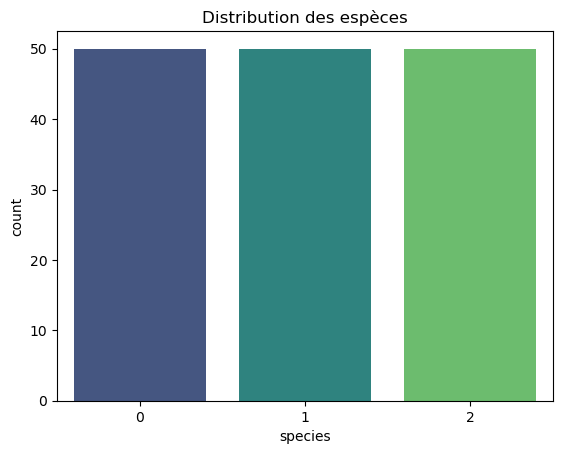

In [47]:
##faisons  un  counplot  pour  voir  la  distribution  des  espèces
sns.countplot(x='species', data=df, palette='viridis')
plt.title('Distribution des espèces')
plt.show()

In [48]:
##frequence  des  espèces
df['species'].value_counts(normalize=True)

species
0    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64

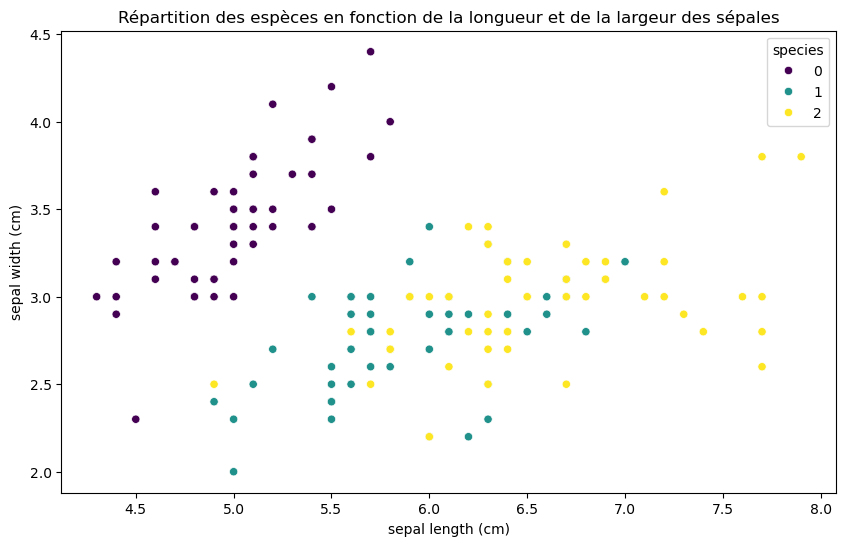

In [49]:
##Visualisation des données
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species', data=df, palette='viridis')
plt.title('Répartition des espèces en fonction de la longueur et de la largeur des sépales')
plt.show()

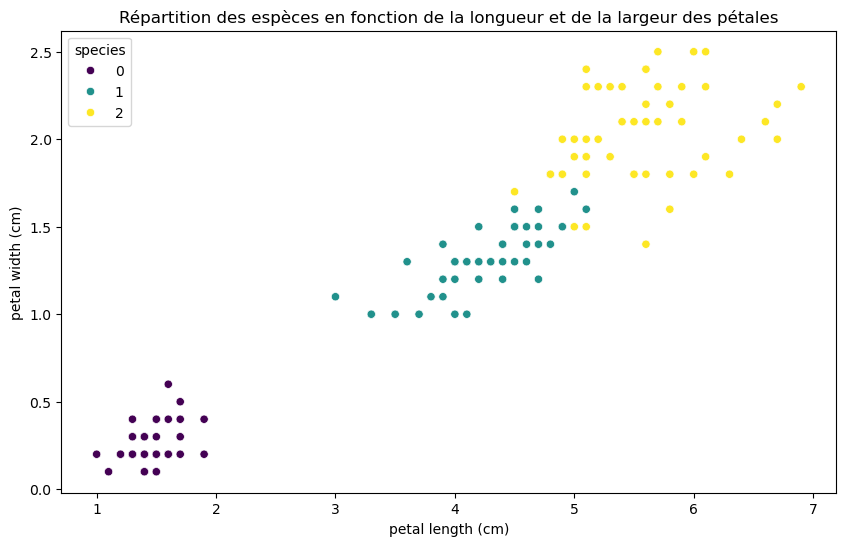

In [50]:
##Visualisation des données
plt.figure(figsize=(10, 6))
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='species', data=df, palette='viridis')
plt.title('Répartition des espèces en fonction de la longueur et de la largeur des pétales')
plt.show()

C:\Users\JAPHET\AppData\Local\Temp\ipykernel_11516\1881501097.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='sepal length (cm)', data=df, palette='viridis')


Text(0.5, 1.0, 'Longueur des sépales en fonction des espèces')

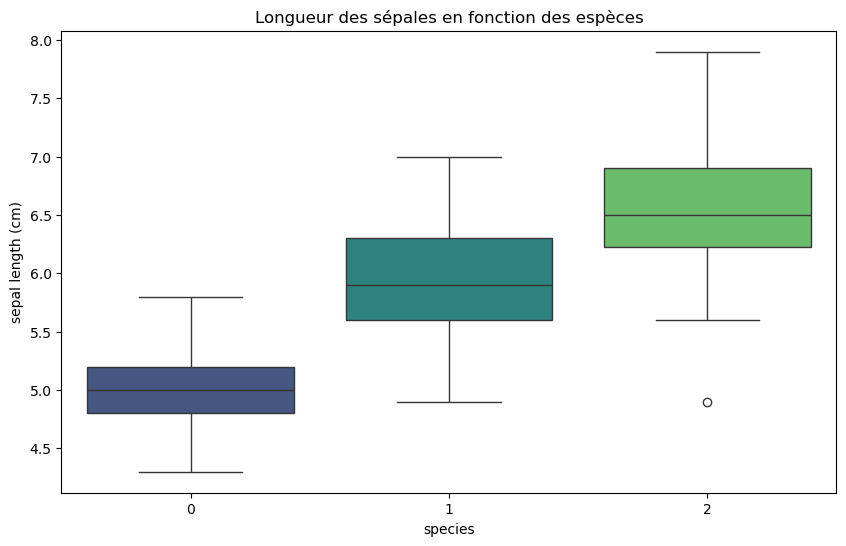

In [51]:
##Visualisation des données
plt.figure(figsize=(10, 6))
#faire  un  boxplot de la longueur des sépales en fonction des espèces
sns.boxplot(x='species', y='sepal length (cm)', data=df, palette='viridis')
plt.title('Longueur des sépales en fonction des espèces')


C:\Users\JAPHET\AppData\Local\Temp\ipykernel_11516\4193489887.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='sepal width (cm)', data=df, palette='viridis')


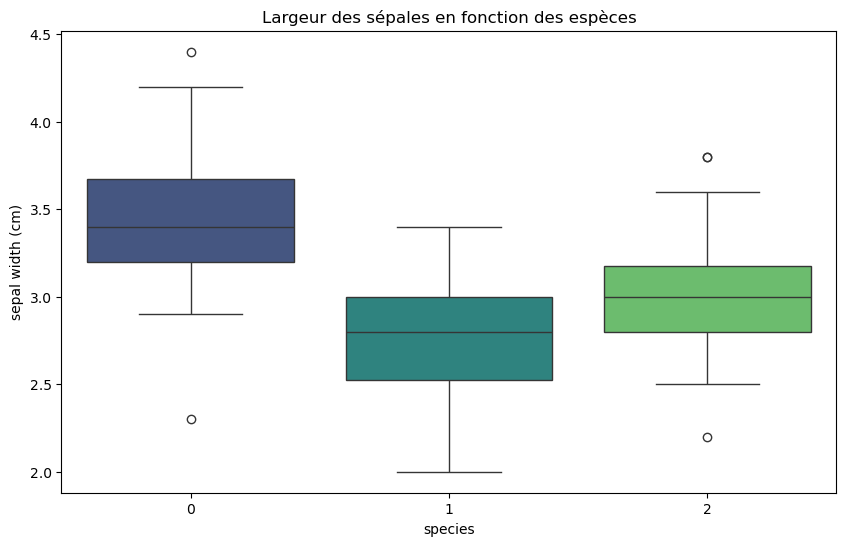

In [52]:
##Visualisation des données
plt.figure(figsize=(10, 6))
#faire  un  boxplot de la largeur des sépales en fonction des espèces
sns.boxplot(x='species', y='sepal width (cm)', data=df, palette='viridis')
plt.title('Largeur des sépales en fonction des espèces')
plt.show()

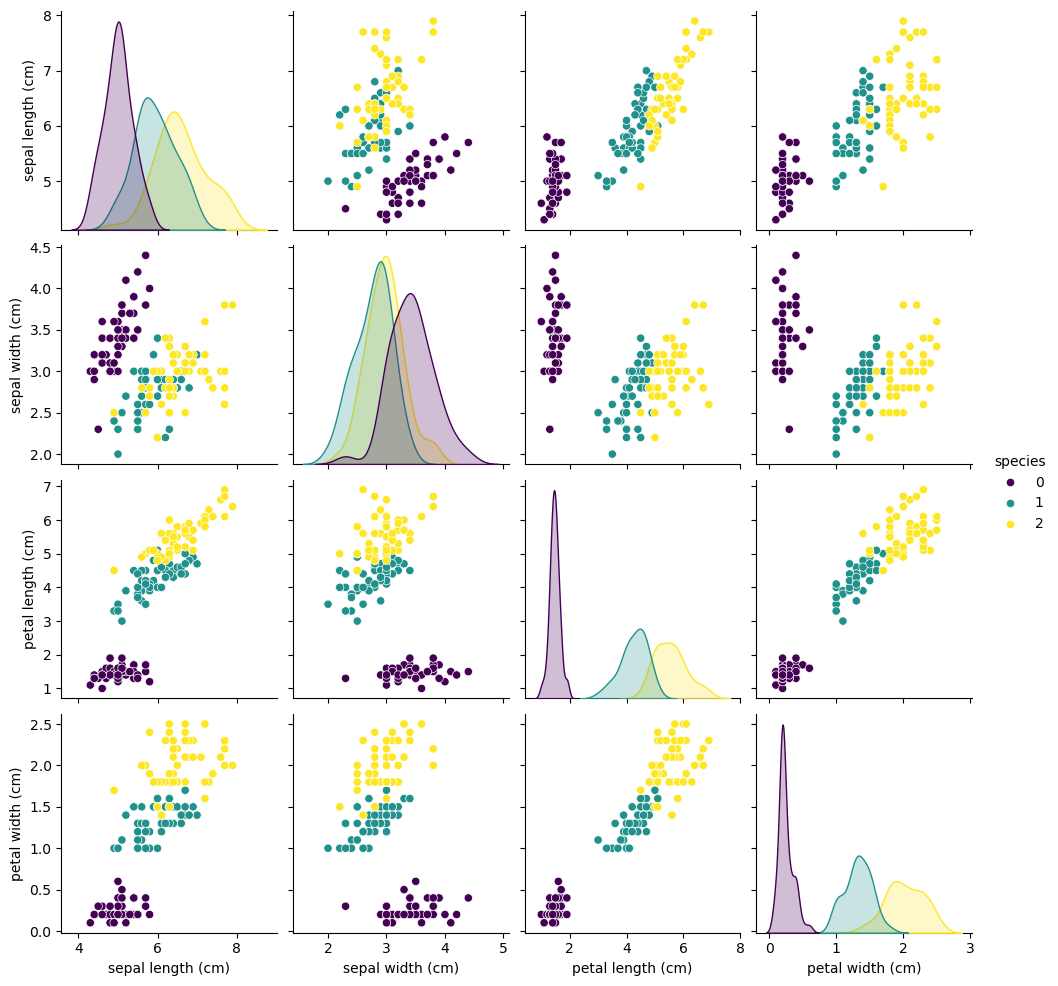

In [53]:
#faire  un  pairplot  pour  voir  la  relation  entre  les  caractéristiques
sns.pairplot(df, hue='species', palette='viridis')
plt.show()

In [54]:
# Définir une fonction pour détecter et traiter les outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Appliquer la fonction à chaque colonne concernée
columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
for column in columns:
    df = remove_outliers(df, column)

# Afficher les premières lignes du DataFrame après traitement des outliers
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<h3 style='color:blue'  Align='center'>3.Prétraitement des Données</h3>

In [55]:
#Séparation des données en variables explicatives et variable cible
X = df.drop('species', axis=1)
y = df['species']


In [56]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
#Normalisation des caractéristiques
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [58]:
#Afficher les dimensions des ensembles d'entraînement et de test
print('Dimensions de X_train:', X_train.shape)
print('Dimensions de X_test:', X_test.shape)
print('Dimensions de y_train:', y_train.shape)
print('Dimensions de y_test:', y_test.shape)


Dimensions de X_train: (116, 4)
Dimensions de X_test: (30, 4)
Dimensions de y_train: (116,)
Dimensions de y_test: (30,)


<h3 style='color:blue'  Align='center'>5.Choix  et  Entrainement des modèles</h3>

In [59]:
#Entraner un modèle de Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
print("SVM Model")
print(f"Accuracy: {accuracy_score(y_test, svm_predictions)}")
print(f"Classification Report:\n{classification_report(y_test, svm_predictions)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, svm_predictions)}\n")



SVM Model
Accuracy: 0.9666666666666667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      1.00      0.94         8
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
[[12  0  0]
 [ 0  8  0]
 [ 0  1  9]]



In [60]:
# Entraîner un modèle de Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest Model")
print(f"Accuracy: {accuracy_score(y_test, rf_predictions)}")
print(f"Classification Report:\n{classification_report(y_test, rf_predictions)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, rf_predictions)}\n")


Random Forest Model
Accuracy: 0.9333333333333333
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.88      0.88         8
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30

Confusion Matrix:
[[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]



In [61]:
# Entraîner un modèle de K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
print("K-Nearest Neighbors Model")
print(f"Accuracy: {accuracy_score(y_test, knn_predictions)}")
print(f"Classification Report:\n{classification_report(y_test, knn_predictions)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, knn_predictions)}\n")


K-Nearest Neighbors Model
Accuracy: 0.9333333333333333
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.88      0.88         8
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30

Confusion Matrix:
[[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]



In [62]:
# Entraîner un modèle de Régression Logistique
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
print("Logistic Regression Model")
print(f"Accuracy: {accuracy_score(y_test, lr_predictions)}")
print(f"Classification Report:\n{classification_report(y_test, lr_predictions)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, lr_predictions)}\n")

Logistic Regression Model
Accuracy: 0.9333333333333333
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.88      0.88         8
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30

Confusion Matrix:
[[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]



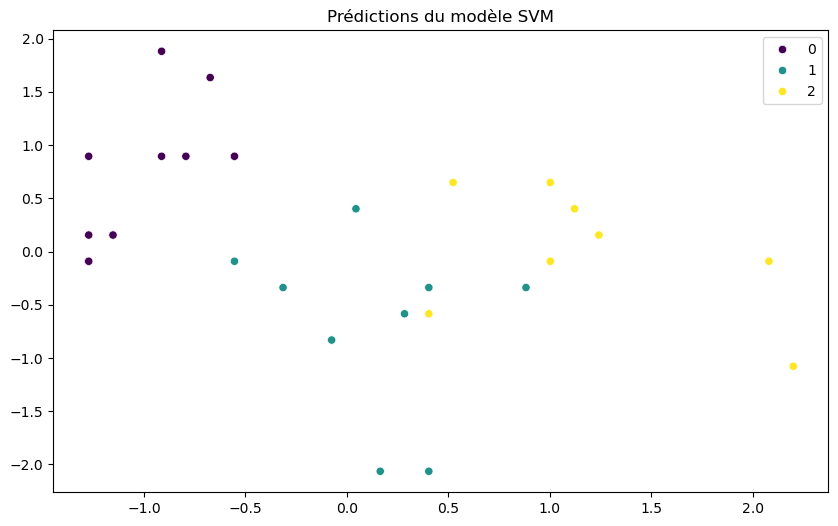

In [63]:
#Visualiser les  prédictions  du  modèle  SVM
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=svm_predictions, palette='viridis')
plt.title('Prédictions du modèle SVM')
plt.show()

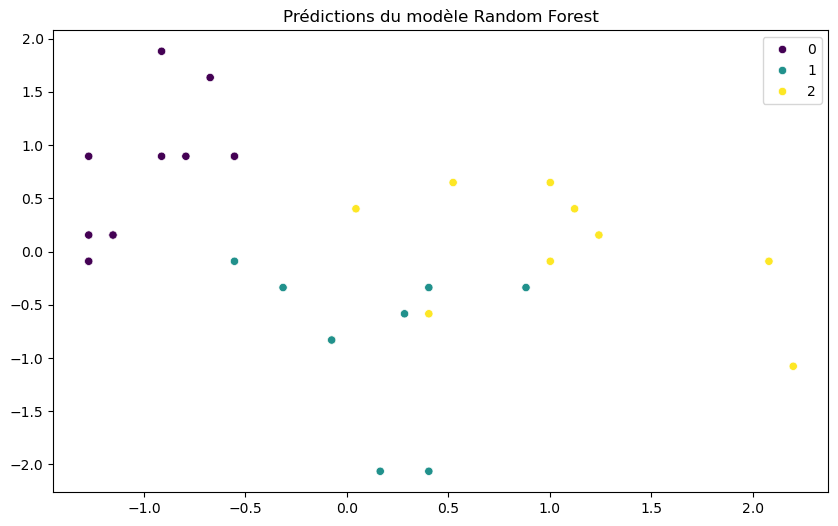

In [64]:
#Visualiser les  prédictions  du  modèle  Random Forest
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=rf_predictions, palette='viridis')
plt.title('Prédictions du modèle Random Forest')
plt.show()

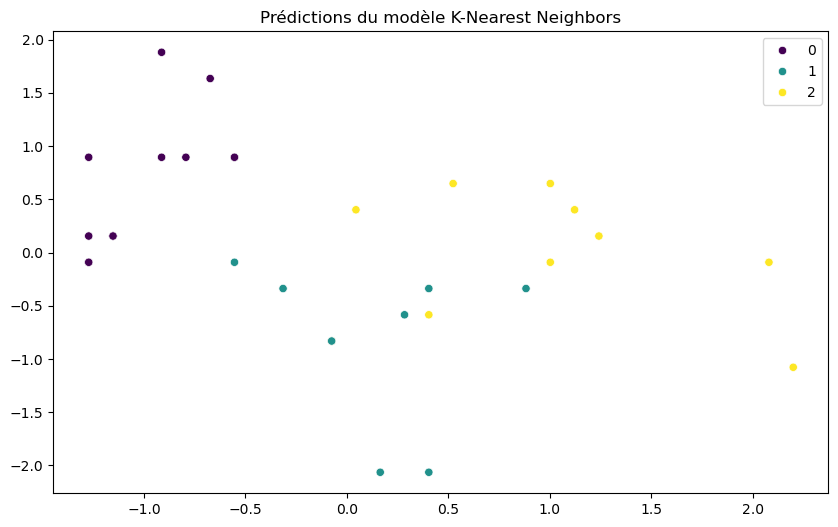

In [65]:
#Visualiser les  prédictions  du  modèle  K-Nearest Neighbors
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=knn_predictions, palette='viridis')
plt.title('Prédictions du modèle K-Nearest Neighbors')
plt.show()

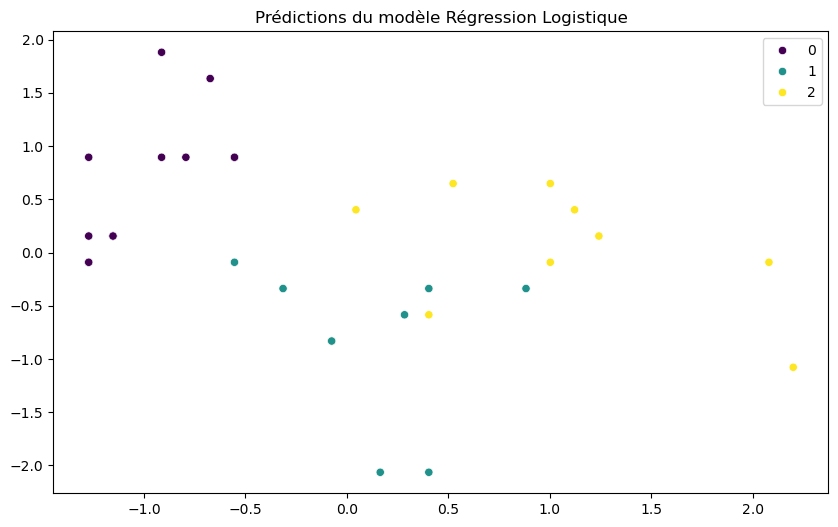

In [66]:
#Visualiser les  prédictions  du  modèle  Régression Logistique
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=lr_predictions, palette='viridis')
plt.title('Prédictions du modèle Régression Logistique')
plt.show()

In [ ]:
# Dictionnaire pour stocker les résultats
results = {}

# Fonction pour entraîner et évaluer un modèle
def train_and_evaluate(model, model_name):
    start_time = time.time()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    end_time = time.time()
    training_time = end_time - start_time
    
    results[model_name] = {
        'Accuracy': accuracy,
        'Training Time (s)': training_time,
        'Cross Val Score (mean)': cross_val_score(model, X, y, cv=5).mean()
    }
    
    print(f"{model_name} Model")
    print(f"Accuracy: {accuracy}")
    print(f"Training Time: {training_time:.4f} seconds")
    print(f"Cross Val Score: {results[model_name]['Cross Val Score (mean)']}")
    print(f"Classification Report:\n{classification_report(y_test, predictions)}")
    


In [ ]:
 # Matrice de confusion
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix - {model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Entraîner et évaluer les modèles
train_and_evaluate(SVC(), "SVM")
train_and_evaluate(RandomForestClassifier(), "Random Forest")
train_and_evaluate(KNeighborsClassifier(), "KNN")
train_and_evaluate(LogisticRegression(max_iter=200), "Logistic Regression")



In [ ]:
# Afficher les résultats sous forme de DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')
print("\nComparaison des modèles:")
print(results_df)

# Afficher les résultats sous forme de graphique
plt.figure(figsize=(8, 5))
sns.barplot(x=results_df.index, y=results_df['Accuracy'])
plt.title("Comparaison des Accuracies des modèles")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

<h3 style='color:blue'  Align='center'>5.Optimisation des  modèles</h3>

In [67]:
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres à optimiser pour le modèle SVM
svm_params = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'linear']}

#initialiser  le  modèle  SVM
svm_model = SVC()

# Initialiser la recherche par grille
svm_grid = GridSearchCV(svm_model, svm_params, refit=True, verbose=3, cv=5)

# Entraîner le modèle
svm_grid.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres pour le modèle SVM:", svm_grid.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.958 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.957 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.957 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.958 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.913 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.913 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.833 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

In [69]:
# Utiliser le meilleur modèle pour faire des prédictions
best_svm = svm_grid.best_estimator_
best_svm.fit(X_train, y_train)
svm_predictions = best_svm.predict(X_test)


In [70]:
#Evaluer  le  modèle  SVM  avec  les  meilleurs  hyperparamètres
print("SVM Model with Best Hyperparameters")
print(f"Accuracy: {accuracy_score(y_test, svm_predictions)}")
print(f"Classification Report:\n{classification_report(y_test, svm_predictions)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, svm_predictions)}\n")


SVM Model with Best Hyperparameters
Accuracy: 0.9666666666666667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.88      0.93         8
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
[[12  0  0]
 [ 0  7  1]
 [ 0  0 10]]



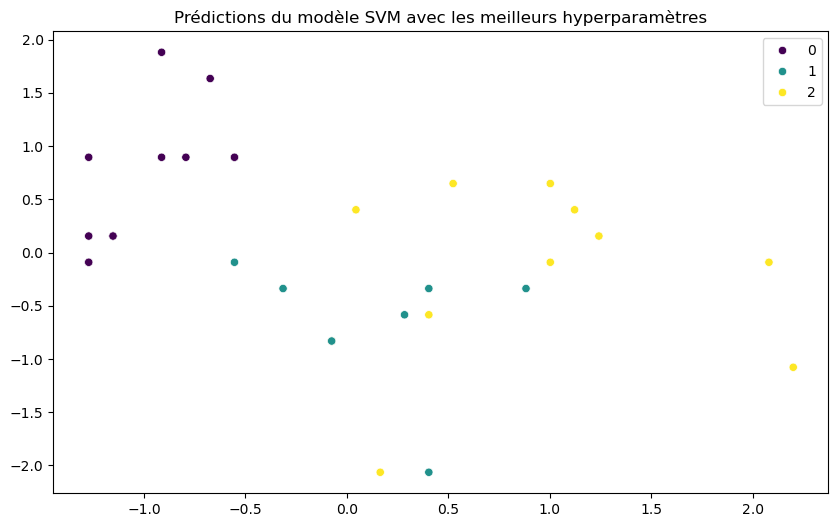

In [72]:
#visualiser  les  prédictions  du  modèle  SVM  avec  les  meilleurs  hyperparamètres
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=svm_predictions, palette='viridis')
plt.title('Prédictions du modèle SVM avec les meilleurs hyperparamètres')
plt.show()

In [73]:
# Optimisation des hyperparamètres pour le modèle Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, refit=True, verbose=3, cv=5)
rf_grid.fit(X_train, y_train)
print("Meilleurs hyperparamètres pour le modèle Random Forest:", rf_grid.best_params_)

# Utiliser le meilleur modèle pour faire des prédictions
best_rf = rf_grid.best_estimator_
best_rf.fit(X_train, y_train)
rf_predictions = best_rf.predict(X_test)

# Evaluer le modèle Random Forest avec les meilleurs hyperparamètres
print("Random Forest Model with Best Hyperparameters")
print(f"Accuracy: {accuracy_score(y_test, rf_predictions)}")
print(f"Classification Report:\n{classification_report(y_test, rf_predictions)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, rf_predictions)}\n")



Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=1.000 total time=   0.1s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.913 total time=   0.1s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=1.000 total time=   0.1s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.957 total time=   0.1s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.3s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.913 total time=   0.3s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 t

In [74]:
# Optimisation des hyperparamètres pour le modèle K-Nearest Neighbors
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, refit=True, verbose=3, cv=5)
knn_grid.fit(X_train, y_train)
print("Meilleurs hyperparamètres pour le modèle K-Nearest Neighbors:", knn_grid.best_params_)

# Utiliser le meilleur modèle pour faire des prédictions
best_knn = knn_grid.best_estimator_
best_knn.fit(X_train, y_train)
knn_predictions = best_knn.predict(X_test)

# Evaluer le modèle K-Nearest Neighbors avec les meilleurs hyperparamètres
print("K-Nearest Neighbors Model with Best Hyperparameters")
print(f"Accuracy: {accuracy_score(y_test, knn_predictions)}")
print(f"Classification Report:\n{classification_report(y_test, knn_predictions)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, knn_predictions)}\n")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.917 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.913 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=1.000 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.913 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.913 total time=   0.0s
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.958 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.913 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=1.000 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.913 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.913 to

In [75]:
# Optimisation des hyperparamètres pour le modèle Régression Logistique
lr_params = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

lr_grid = GridSearchCV(LogisticRegression(max_iter=200), lr_params, refit=True, verbose=3, cv=5)
lr_grid.fit(X_train, y_train)
print("Meilleurs hyperparamètres pour le modèle Régression Logistique:", lr_grid.best_params_)

# Utiliser le meilleur modèle pour faire des prédictions
best_lr = lr_grid.best_estimator_
best_lr.fit(X_train, y_train)
lr_predictions = best_lr.predict(X_test)

# Evaluer le modèle Régression Logistique avec les meilleurs hyperparamètres
print("Logistic Regression Model with Best Hyperparameters")
print(f"Accuracy: {accuracy_score(y_test, lr_predictions)}")
print(f"Classification Report:\n{classification_report(y_test, lr_predictions)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, lr_predictions)}\n")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ...........C=0.1, solver=newton-cg;, score=0.917 total time=   0.1s
[CV 2/5] END ...........C=0.1, solver=newton-cg;, score=0.783 total time=   0.0s
[CV 3/5] END ...........C=0.1, solver=newton-cg;, score=0.957 total time=   0.0s
[CV 4/5] END ...........C=0.1, solver=newton-cg;, score=0.913 total time=   0.0s
[CV 5/5] END ...........C=0.1, solver=newton-cg;, score=0.913 total time=   0.0s
[CV 1/5] END ...............C=0.1, solver=lbfgs;, score=0.917 total time=   0.0s
[CV 2/5] END ...............C=0.1, solver=lbfgs;, score=0.783 total time=   0.0s
[CV 3/5] END ...............C=0.1, solver=lbfgs;, score=0.957 total time=   0.0s
[CV 4/5] END ...............C=0.1, solver=lbfgs;, score=0.913 total time=   0.0s
[CV 5/5] END ...............C=0.1, solver=lbfgs;, score=0.913 total time=   0.0s
[CV 1/5] END ...........C=0.1, solver=liblinear;, score=0.875 total time=   0.0s
[CV 2/5] END ...........C=0.1, solver=liblinear;

<h3 style='color:blue'  Align='center'>6.Test et Validation du  modèle</h3>

In [76]:
# Test et validation du modèle Régression Logistique
lr_predictions = lr_model.predict(X_test)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, lr_predictions)
classification_rep = classification_report(y_test, lr_predictions)
confusion_mat = confusion_matrix(y_test, lr_predictions)

print("Logistic Regression Model")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")
print(f"Confusion Matrix:\n{confusion_mat}")



Logistic Regression Model
Accuracy: 0.9333333333333333
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.88      0.88         8
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30

Confusion Matrix:
[[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]


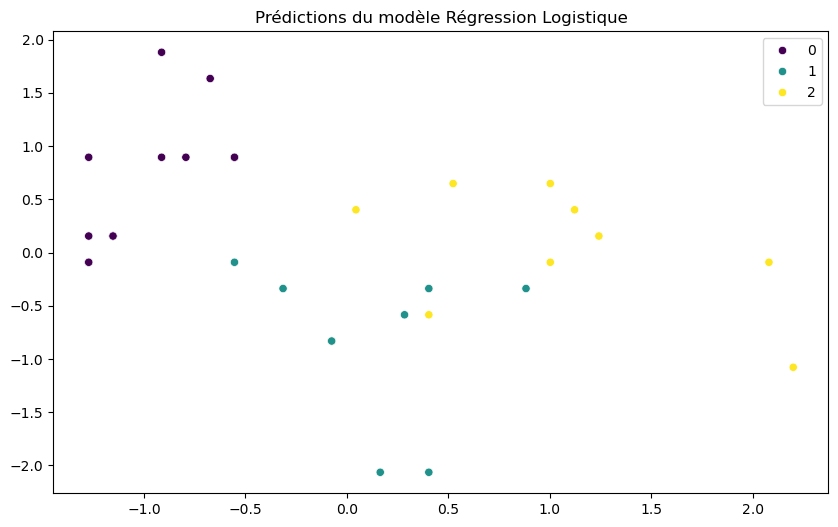

In [77]:
# Visualiser les prédictions du modèle Régression Logistique
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=lr_predictions, palette='viridis')
plt.title('Prédictions du modèle Régression Logistique')
plt.show()

<h3 style='color:blue'  Align='center'>7.Déploiement</h3>

In [79]:
import joblib
# Enregistrer le modèle regresssion logistique
joblib.dump(best_lr, 'logistic_regression_model.pkl')


['logistic_regression_model.pkl']